# 2.3: Complex Machine Learning Models and Keras Part 2 - Random Forest for BELGRADE

## Table of Contents

### 1. Import libraries and data (cleaned_DF and plweather)
### 2. Data Transformation/Wrangling
### 3. Data reshaping
### 4. Data splitting
### 5. Random Forest Model
### 6. Recognising the Important Features

## 1. Import libraries and data (clened_DF and plweather)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [16]:
# defining the path
path = r'C:/users/localadmin/Machine Learning 1'

In [19]:
# Importing cleaned data
X = pd.read_csv(os.path.join(path, 'Data Sets', 'Processed Data/cleaned_DF.csv'), index_col = False)

In [22]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [25]:
X.shape

(22950, 137)

In [29]:
#Import pleasant weather data as plweather
plweather = pd.read_csv(os.path.join(path, 'Data Sets','Original data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [32]:
plweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
plweather.shape

(22950, 16)

## 2. Data Transformation/Wrangling

Creating a dataset for Belgrade only

In [43]:
# Create a list of the columns containing "Basel" in their names

belgrade_list = list(x for x in X.columns if x.find('BELGRADE') >=0)
belgrade_list

['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [46]:
# Create a dataframe with those columns

df_belgrade = X[belgrade_list]
df_belgrade

,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max
0,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9
1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4
2,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4
3,8,0.93,1.0268,0.25,0.00,0.0,2.0,-2.0,3.0
4,8,0.99,1.0286,0.25,0.06,0.0,2.0,0.7,2.8
...,...,...,...,...,...,...,...,...,...
22945,2,0.68,1.0278,1.57,0.18,5.7,18.2,12.1,24.4
22946,0,0.68,1.0295,1.57,0.18,5.7,15.9,10.6,21.2
22947,2,0.68,1.0278,1.57,0.18,5.7,13.4,8.6,18.2
22948,1,0.68,1.0238,1.57,0.18,5.7,15.0,9.1,20.9


In [50]:
# Reduce plweather dataset to madrid plweather only

plweather_belgrade = plweather['BELGRADE_pleasant_weather']
plweather_belgrade

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [53]:
df_belgrade.shape # observations dataset has the correct shape

(22950, 9)

In [56]:
plweather_belgrade.shape # predictions dataset has the correct shape

(22950,)

## 3. Data Reshaping

In [61]:
X2 = df_belgrade

In [64]:
y2 = plweather_belgrade

In [67]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [70]:
X.shape

(22950, 9)

In [72]:
y.shape

(22950,)

## 4. Data Splitting

In [79]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [82]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [85]:
X_train

array([[ 3.    ,  0.53  ,  1.0132, ..., 22.5   , 16.2   , 28.6   ],
       [ 1.    ,  0.66  ,  1.0209, ..., -3.6   , -6.    ,  0.1   ],
       [ 7.    ,  0.94  ,  1.0104, ...,  3.2   ,  1.6   ,  6.7   ],
       ...,
       [ 3.    ,  0.62  ,  1.0183, ..., 13.8   ,  7.6   , 21.    ],
       [ 4.    ,  0.62  ,  1.0121, ..., 20.6   , 17.    , 25.6   ],
       [ 4.    ,  0.43  ,  1.0139, ..., 15.2   , 10.9   , 22.2   ]])

In [87]:
y_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [89]:
X_test

array([[ 4.    ,  0.57  ,  1.0131, ..., 24.7   , 19.    , 29.6   ],
       [ 3.    ,  0.59  ,  1.0256, ...,  0.3   , -2.1   ,  5.3   ],
       [ 1.    ,  0.6   ,  1.0118, ..., 23.7   , 16.3   , 29.3   ],
       ...,
       [ 1.    ,  0.68  ,  1.0197, ..., 12.4   ,  5.3   , 19.3   ],
       [ 6.    ,  0.75  ,  1.0229, ...,  7.6   ,  5.7   , 12.4   ],
       [ 1.    ,  0.54  ,  1.0149, ..., 26.4   , 19.5   , 31.8   ]])

In [91]:
y_test

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

## 5. Belgrade Random Forest

In [96]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


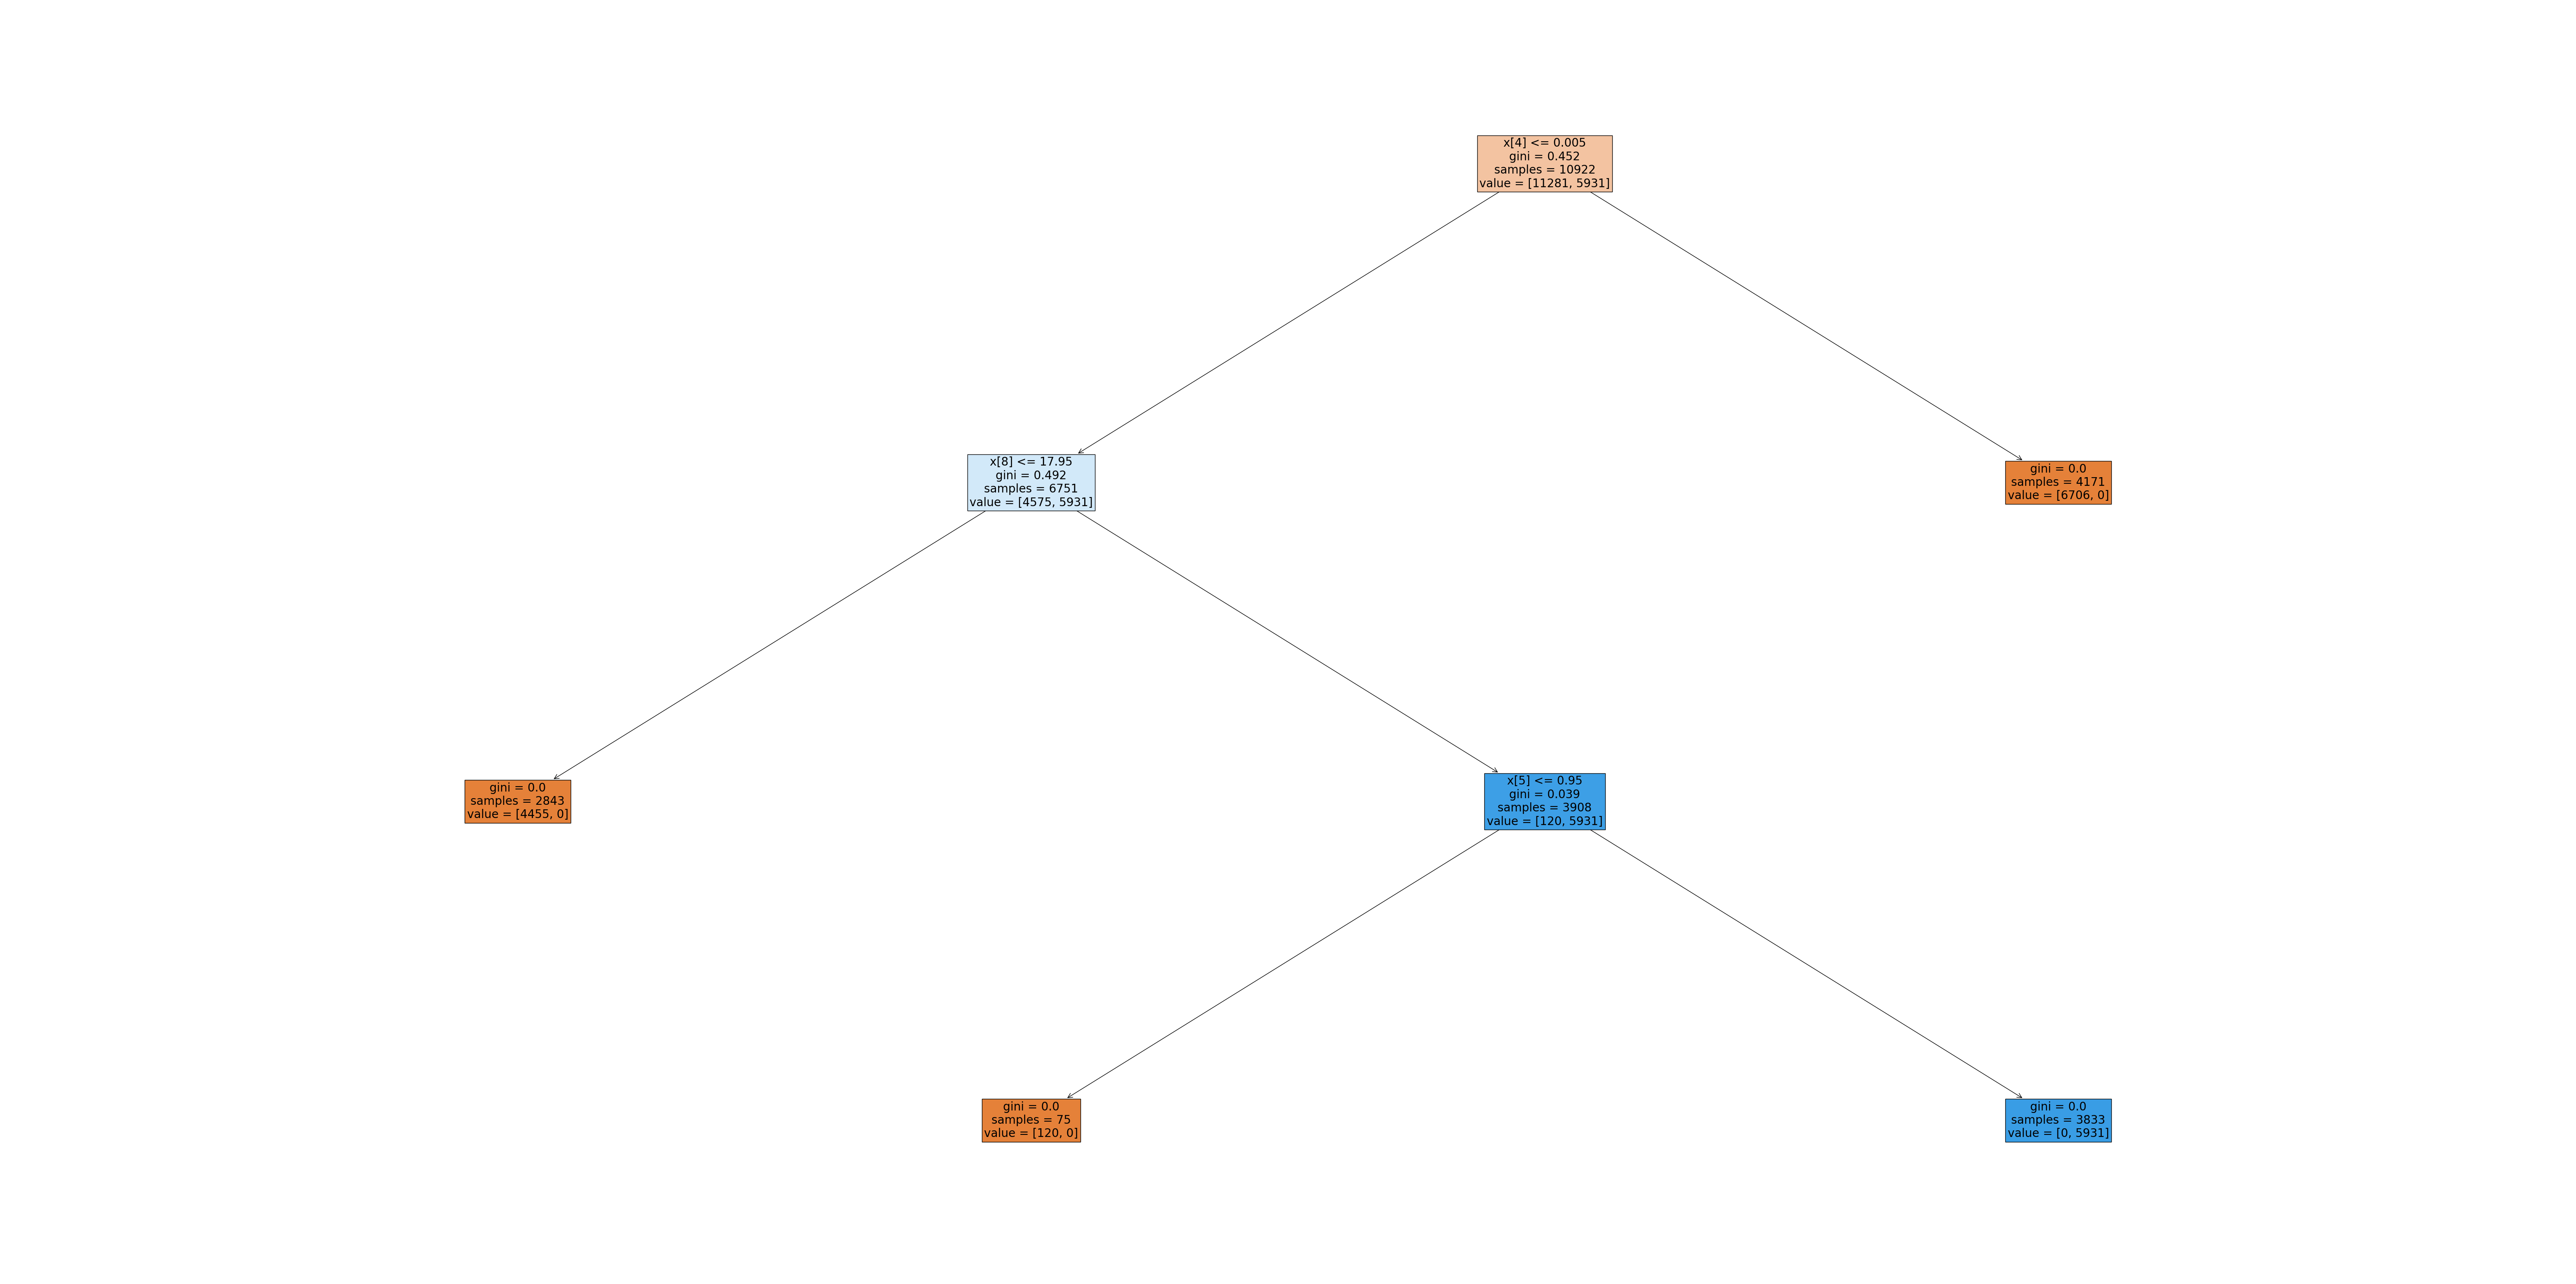

In [104]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [107]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_Belgrade.png'),bbox_inches='tight')

## 6. Recognising the important features

In [113]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02851544, 0.01373462, 0.00978751, 0.03623825, 0.34843295,
       0.10623819, 0.10786515, 0.03160153, 0.31758636])

In [121]:
# Create a list of weather features

wx_list = [feature.replace('BELGRADE_', '') for feature in belgrade_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [124]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.028515
humidity            0.013735
pressure            0.009788
global_radiation    0.036238
precipitation       0.348433
sunshine            0.106238
temp_mean           0.107865
temp_min            0.031602
temp_max            0.317586
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


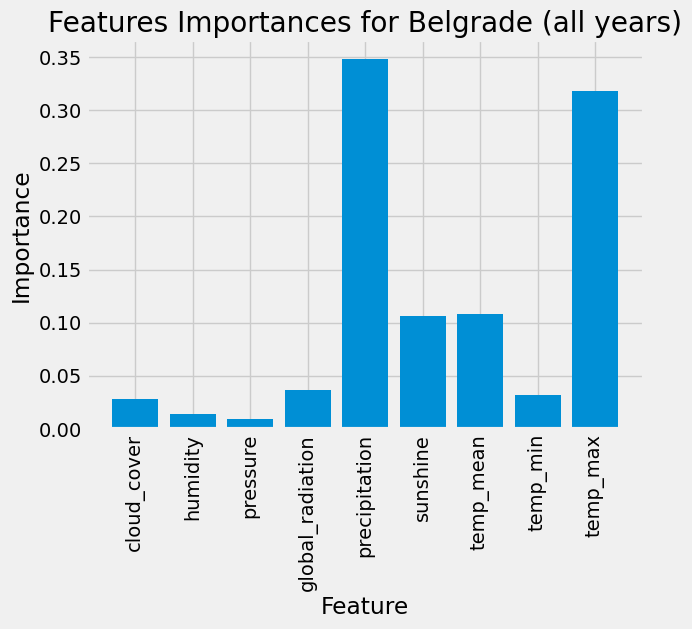

In [133]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Belgrade (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Belgrade_feature_importances.png'), bbox_inches='tight')
plt.show()